# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [1]:
! git clone https://github.com/Troy-S-Meink/linearRegression

Cloning into 'linearRegression'...
remote: Enumerating objects: 123, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 123 (delta 52), reused 13 (delta 7), pack-reused 30 (from 1)
Receiving objects: 100% (123/123), 3.48 MiB | 6.02 MiB/s, done.
Resolving deltas: 100% (54/54), done.


In [2]:
# Importing relavant packages:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
# 1.
path = '/content/linearRegression/04_hedonic_pricing/pierce_county_house_sales.csv' # Pulling the houses data
df = pd.read_csv(path, low_memory=False) # Creating an airbnb dataframe

# Displaying the dataframe to take a preliminary look
df.head()

,sale_date,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,hvac_description,exterior,interior,stories,roof_cover,year_built,bedrooms,bathrooms,waterfront_type,view_quality,utility_sewer
0,2020-01-02,380000,2157,0,0,528,0,0,Warm and Cool Air Zone,Frame Siding,Drywall,2,Composition Shingle,1993,3,3,NaN,NaN,SEWER/SEPTIC INSTALLED
1,2020-01-02,383000,2238,0,0,396,0,0,Forced Air,Frame Siding,Drywall,2,Composition Shingle,2017,4,3,NaN,NaN,SEWER/SEPTIC INSTALLED
2,2020-01-01,419900,1452,0,0,0,0,1,Forced Air,Frame Siding,Drywall,1,Built Up Rock,1965,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED
3,2020-01-02,251660,832,0,0,0,0,0,Forced Air,Frame Vinyl,Drywall,1,Composition Shingle,1919,2,1,NaN,NaN,SEWER/SEPTIC INSTALLED
4,2020-01-02,500000,1780,0,384,484,0,1,Forced Air,Frame Siding,Drywall,1,Composition Shingle,1955,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED


In [4]:
# Pulling only the data I want to work with:
df = df[['sale_price', 'house_square_feet', 'bedrooms', 'bathrooms']]

# Displaying the dataframe again to verify the changes
df.head()

,sale_price,house_square_feet,bedrooms,bathrooms
0,380000,2157,3,3
1,383000,2238,4,3
2,419900,1452,3,2
3,251660,832,2,1
4,500000,1780,3,2


In [5]:
# Replacing all of the string values with numbers
df['sale_price'] = pd.to_numeric(df['sale_price'])
df['house_square_feet'] = pd.to_numeric(df['house_square_feet'])
df['bedrooms'] = pd.to_numeric(df['bedrooms'])
df['bathrooms'] = pd.to_numeric(df['bathrooms'])

In [6]:
# Taking a quick look at some statistics
print(df.describe(), '\n')

# Checking for if there are any null values (there is none)
print(df.isnull().sum())

         sale_price  house_square_feet      bedrooms     bathrooms
count  1.681400e+04       16814.000000  16814.000000  16814.000000
mean   4.612332e+05        1879.941953      3.277983      2.317176
std    2.360833e+05         760.419008      0.891240      0.827956
min    2.000000e+03           1.000000      0.000000      0.000000
25%    3.480000e+05        1320.000000      3.000000      2.000000
50%    4.165000e+05        1774.000000      3.000000      2.000000
75%    5.238065e+05        2352.000000      4.000000      3.000000
max    6.130000e+06        9510.000000     25.000000      8.000000 

sale_price           0
house_square_feet    0
bedrooms             0
bathrooms            0
dtype: int64


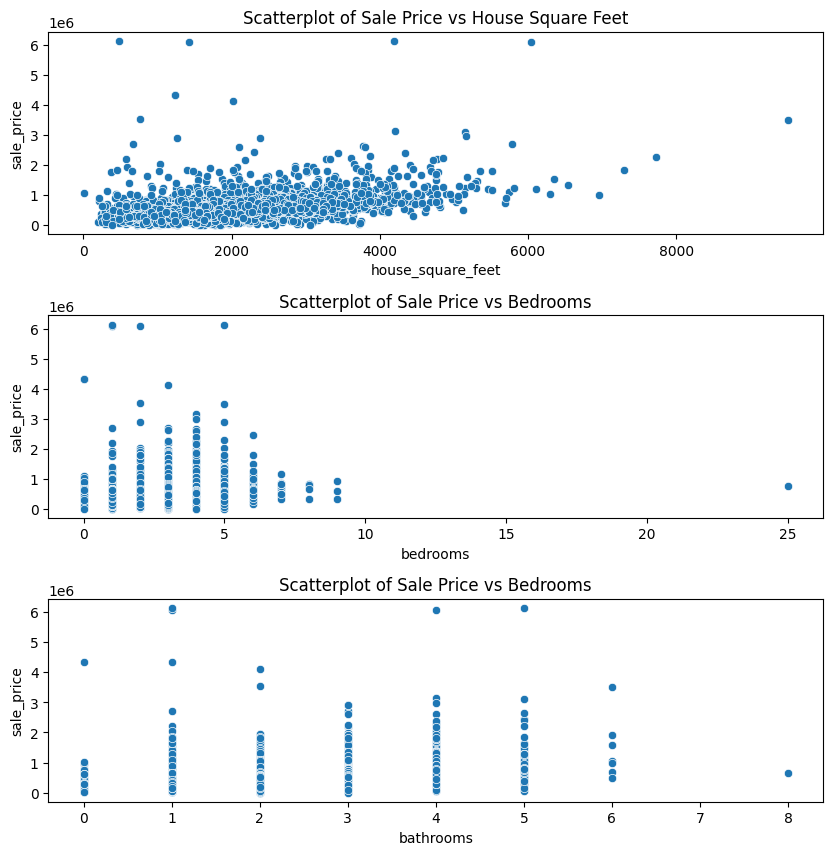

In [7]:
# Taking a look at scatterplots of the data
fig, ax = plt.subplots(3, 1, figsize=(10,10))
sns.scatterplot(x=df['house_square_feet'],y=df['sale_price'], ax=ax[0])
ax[0].set_title('Scatterplot of Sale Price vs House Square Feet')

sns.scatterplot(x=df['bedrooms'],y=df['sale_price'], ax=ax[1])
ax[1].set_title('Scatterplot of Sale Price vs Bedrooms')

sns.scatterplot(x=df['bathrooms'],y=df['sale_price'], ax=ax[2])
ax[2].set_title('Scatterplot of Sale Price vs Bedrooms')

plt.subplots_adjust(hspace=0.4)
plt.show()

In [8]:
# The data doesn't look like it's fit very
#  well, so I'll try reformatting the data

In [9]:
# Converting the values to arcsinh:
df['sale_price_arcsinh'] = np.arcsinh(df['sale_price'])
df['house_square_feet_arcsinh'] = np.arcsinh(df['house_square_feet'])
df['bedrooms_arcsinh'] = np.arcsinh(df['bedrooms'])
df['bathrooms_arcsinh'] = np.arcsinh(df['bathrooms'])

# Converting the values to log:
df['sale_price_log'] = np.log(df['sale_price'])
df['house_square_feet_log'] = np.log(df['house_square_feet'])
df['bedrooms_log'] = np.log(df['bedrooms'])
df['bathrooms_log'] = np.log(df['bathrooms'])

df.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,sale_price,house_square_feet,bedrooms,bathrooms,sale_price_arcsinh,house_square_feet_arcsinh,bedrooms_arcsinh,bathrooms_arcsinh,sale_price_log,house_square_feet_log,bedrooms_log,bathrooms_log
0,380000,2157,3,3,13.541074,8.369621,1.818446,1.818446,12.847927,7.676474,1.098612,1.098612
1,383000,2238,4,3,13.548937,8.406485,2.094713,1.818446,12.855790,7.713338,1.386294,1.098612
2,419900,1452,3,2,13.640919,7.973844,1.818446,1.443635,12.947772,7.280697,1.098612,0.693147
3,251660,832,2,1,13.128981,7.416980,1.443635,0.881374,12.435834,6.723832,0.693147,0.000000
4,500000,1780,3,2,13.815511,8.177516,1.818446,1.443635,13.122363,7.484369,1.098612,0.693147


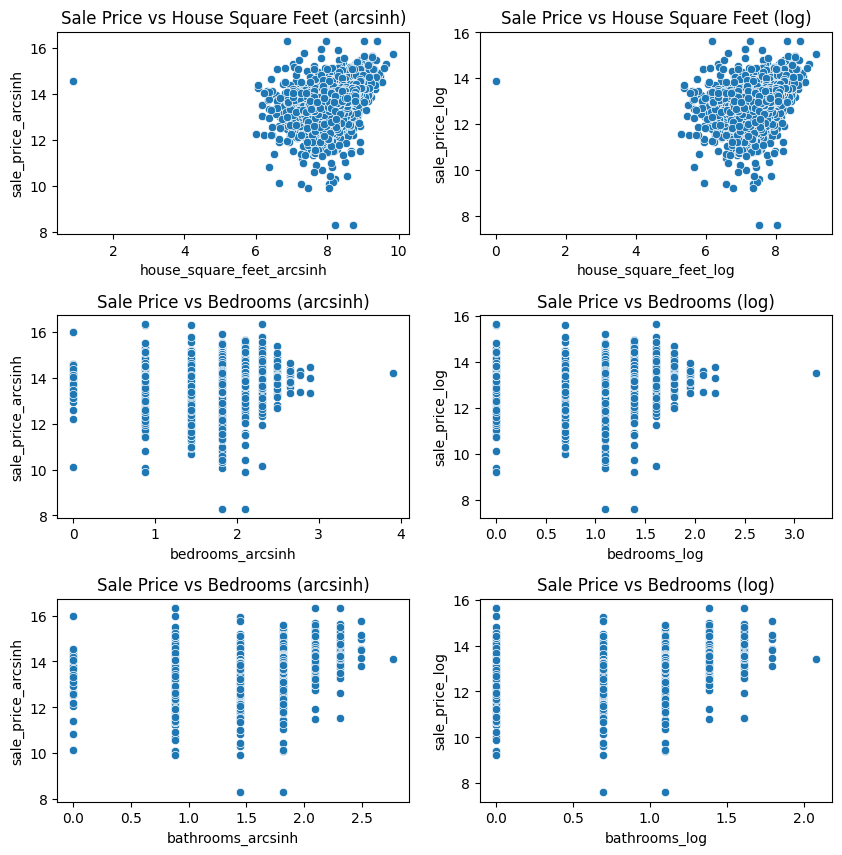

In [10]:
# Taking a look at scatterplots of the data
fig, ax = plt.subplots(3, 2, figsize=(10,10))
sns.scatterplot(x=df['house_square_feet_arcsinh'],y=df['sale_price_arcsinh'], ax=ax[0,0])
ax[0,0].set_title('Sale Price vs House Square Feet (arcsinh)')
sns.scatterplot(x=df['bedrooms_arcsinh'],y=df['sale_price_arcsinh'], ax=ax[1,0])
ax[1,0].set_title('Sale Price vs Bedrooms (arcsinh)')
sns.scatterplot(x=df['bathrooms_arcsinh'],y=df['sale_price_arcsinh'], ax=ax[2,0])
ax[2,0].set_title('Sale Price vs Bedrooms (arcsinh)')

sns.scatterplot(x=df['house_square_feet_log'],y=df['sale_price_log'], ax=ax[0,1])
ax[0,1].set_title('Sale Price vs House Square Feet (log)')
sns.scatterplot(x=df['bedrooms_log'],y=df['sale_price_log'], ax=ax[1,1])
ax[1,1].set_title('Sale Price vs Bedrooms (log)')
sns.scatterplot(x=df['bathrooms_log'],y=df['sale_price_log'], ax=ax[2,1])
ax[2,1].set_title('Sale Price vs Bedrooms (log)')

plt.subplots_adjust(hspace=0.4)
plt.show()

In [12]:
# The arcsinh data seems to be the best formatted, I'll use
#  that moving forward.

In [13]:
# 2.
# Turning the number of bathrooms and
#  bedrooms into categorical variables
pd.get_dummies(df['bedrooms'])
pd.get_dummies(df['bathrooms'])

,0,1,2,3,4,5,6,8
0,False,False,False,True,False,False,False,False
1,False,False,False,True,False,False,False,False
2,False,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...
16809,False,False,False,True,False,False,False,False
16810,False,False,False,True,False,False,False,False
16811,False,True,False,False,False,False,False,False
16812,False,True,False,False,False,False,False,False


In [49]:
# 3.
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# Splitting the data 80/20
y = df['sale_price_arcsinh'] # Create target variable vector
X = df.loc[:,['house_square_feet','bedrooms', 'bathrooms']] # Create feature matrix
X = X.apply(maxmin) # Normalize X

# Split the sample:
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

In [50]:
# 4.
# Running a single-linear regression on the TRAINING data:

# Fitting the LM based on the TRAINING data
reg = LinearRegression().fit(X_train, y_train)

# Printing the model outputs
print('Intercept:\t', reg.intercept_) # Intercept value
print('Reg. Coeffs:\t', reg.coef_) # Regression coefficients
print('R^2:\t\t', reg.score(X_train, y_train)) # R squared measure

Intercept:	 13.067788112426953
Reg. Coeffs:	 [ 2.75341653 -1.21885041  0.66681907]
R^2:		 0.340370921201102


In [51]:
# Running a single-linear regression on the TESTING data:

# Fitting the LM based on the TESTING data
reg = LinearRegression().fit(X_test, y_test)

# Printing the model outputs
print('Intercept:\t', reg.intercept_) # Intercept value
print('Reg. Coeffs:\t', reg.coef_) # Regression coefficients
print('R^2:\t\t', reg.score(X_test, y_test)) # R squared measure

Intercept:	 13.040597787067327
Reg. Coeffs:	 [ 2.73708588 -0.9462585   0.65678795]
R^2:		 0.38107337172930633


In [52]:
# The train and test data performed similarly.
#  This means it's not over or underfitting.

# The test data did slightly outperform the training
#  data so there might be a bit of overfitting.

In [53]:
# 5.
# Adding a bedrooms*bathrooms column to the X_train
#  df to see how it impacts performance:
X_train['bedrooms_bathrooms'] = X_train['bedrooms'] * X_train['bathrooms']
X_test['bedrooms_bathrooms'] = X_test['bedrooms'] * X_test['bathrooms']
# Seeing if there's a non-linear correlation between price and sq-feet. By
#  squaring the size of the house we can see if it plays a larger effect
#  on the price of a house.
X_train['house_square_feet_squared'] = X_train['house_square_feet'] * X_train['house_square_feet']
X_test['house_square_feet_squared'] = X_test['house_square_feet'] * X_test['house_square_feet']

# Re-running the regression to see if it improves:
reg = LinearRegression().fit(X_train, y_train)
# Printing the model outputs
print('Intercept:\t', reg.intercept_) # Intercept value
print('Reg. Coeffs:\t', reg.coef_) # Regression coefficients
print('R^2:\t\t', reg.score(X_train, y_train), '\n') # R squared measure

# Re-running the regression to see if it improves:
reg = LinearRegression().fit(X_test, y_test)
# Printing the model outputs
print('Intercept:\t', reg.intercept_) # Intercept value
print('Reg. Coeffs:\t', reg.coef_) # Regression coefficients
print('R^2:\t\t', reg.score(X_test, y_test)) # R squared measure

Intercept:	 13.05336780858064
Reg. Coeffs:	 [ 2.89589592 -1.20204779  0.67192554 -0.11316448 -0.2839723 ]
R^2:		 0.3404177849570498 

Intercept:	 12.965569304578441
Reg. Coeffs:	 [ 2.71331776 -0.31198759  0.92901718 -2.12754684  0.06527913]
R^2:		 0.38158568735276865


In [ ]:
# The performance was increased very slightly on the test data(by about 0.1%).